In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#from pandas_profiling import ProfileReport
#!pip install -U ydata-profiling
#from ydata_profiling import ProfileReport
import os
import time



In [2]:
train=pd.read_csv(r'C:\Users\DELL\Downloads\ml on black_friday\black_train.csv') 
test=pd.read_csv(r'C:\Users\DELL\Downloads\ml on black_friday\black_test.csv') 

In [3]:
# Create a profile report
#profile = ProfileReport(train, title="Black_friday Dataset Profiling Report", explorative=True)

# Save the report as an HTML file
#profile.to_file("iris_dataset_profile_report.html")

# Display the report in a Jupyter Notebook (if you're using one)
#profile.to_notebook_iframe()  # Uncomment this line if using Jupyter Notebook

In [4]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [6]:
train.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


In [7]:
test.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN
233598,1006039,P00316642,F,46-50,0,B,4+,1,4,5.0,NaN


In [8]:
print('Trainig Data : Rows: {} columns : {}'.format(train.shape[0],train.shape[1]))

Trainig Data : Rows: 550068 columns : 12


In [9]:
train.shape

(550068, 12)

In [10]:
test.shape

(233599, 11)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [13]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,9.842329e+00,5.086590,2.0,5.0,9.0,15.0,18.0
Product_Category_3,166821.0,1.266824e+01,4.125338,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [14]:
test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [15]:
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [16]:
# checking null values %
round((train.isnull().sum()/train.shape[0])*100,2).astype(str) + '%'

User_ID                         0.0%
Product_ID                      0.0%
Gender                          0.0%
Age                             0.0%
Occupation                      0.0%
City_Category                   0.0%
Stay_In_Current_City_Years      0.0%
Marital_Status                  0.0%
Product_Category_1              0.0%
Product_Category_2            31.57%
Product_Category_3            69.67%
Purchase                        0.0%
dtype: object

In [17]:
train['Age'].value_counts()

Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64

In [18]:
round(train['Age'].value_counts(normalize=True).mul(100),2).astype(str) + '%'

Age
26-35    39.92%
36-45     20.0%
18-25    18.12%
46-50     8.31%
51-55      7.0%
55+       3.91%
0-17      2.75%
Name: proportion, dtype: object

In [19]:
train['Stay_In_Current_City_Years'].value_counts()

Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: count, dtype: int64

In [20]:
round(train['Stay_In_Current_City_Years'].value_counts(normalize=True).mul(100),2).astype(str) + '%'

Stay_In_Current_City_Years
1     35.24%
2     18.51%
3     17.32%
4+     15.4%
0     13.53%
Name: proportion, dtype: object

<Figure size 2000x1000 with 0 Axes>

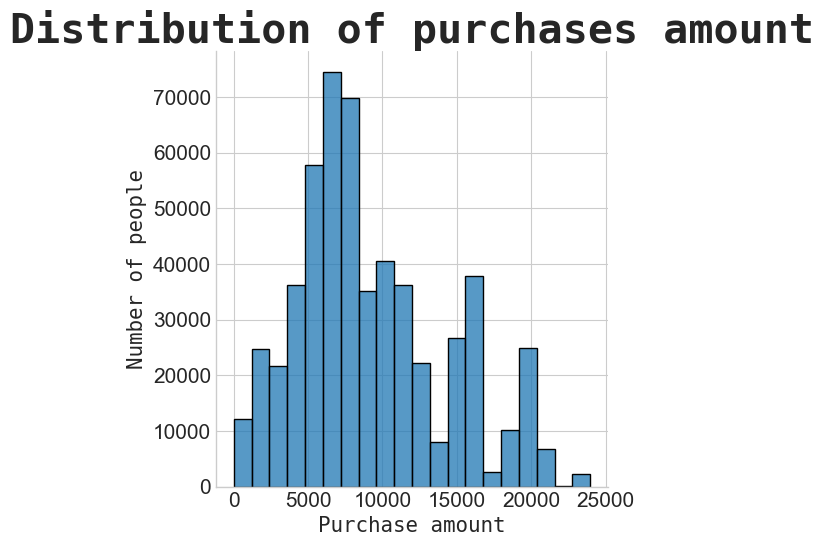

In [21]:
# Creating distplot for dependent feature 'Purchase'
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(20,10))
sns.displot(train['Purchase'],bins=20)
plt.title('Distribution of purchases amount', fontdict={'fontname':'Monospace','fontsize':30,'fontweight':'bold'})
plt.xlabel('Purchase amount', fontdict={'fontname':'Monospace','fontsize':15})
plt.ylabel('Number of people', fontdict={'fontname':'Monospace','fontsize':15})
plt.tick_params(labelsize=15)
plt.show()

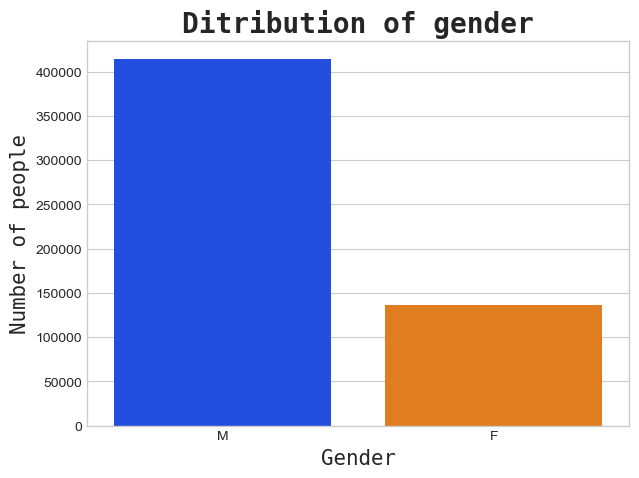

In [22]:
# Creating a barplot for 'Gender'
gen = train['Gender'].value_counts()
plt.figure(figsize=(7,5))
plt.style.use('_classic_test_patch')
sns.barplot(x=gen.index, y=gen.values, palette='bright')
plt.title('Ditribution of gender', fontdict= {'fontname':'Monospace','fontsize':20,'fontweight':'bold'})
plt.xlabel('Gender', fontdict={'fontname':'Monospace','fontsize':15})
plt.ylabel('Number of people', fontdict={'fontname':'Monospace','fontsize':15})
plt.tick_params(labelsize=10)
plt.show()

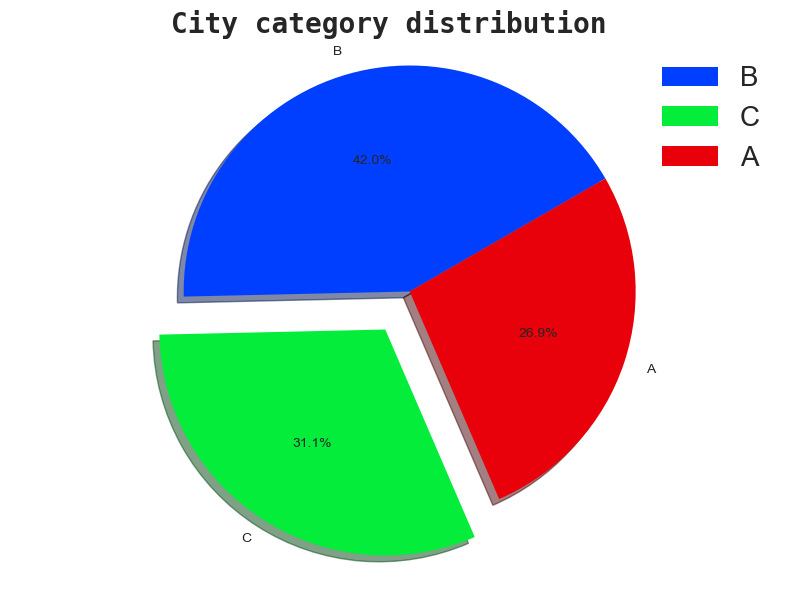

In [23]:
# Create a pie chart for 'city_category'
city = train['City_Category'].value_counts()
plt.style.use('seaborn-v0_8-bright')
plt.figure(figsize=(10,7))
plt.pie(city.values,labels=city.index,startangle=30,explode=(0,0.20,0), shadow=True, autopct="%1.1f%%")
plt.title('City category distribution ', fontdict= {'fontname':'Monospace','fontsize':20,'fontweight':'bold'})
plt.legend()
plt.legend(prop={'size':20})
plt.axis('equal')
plt.show()

In [24]:
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


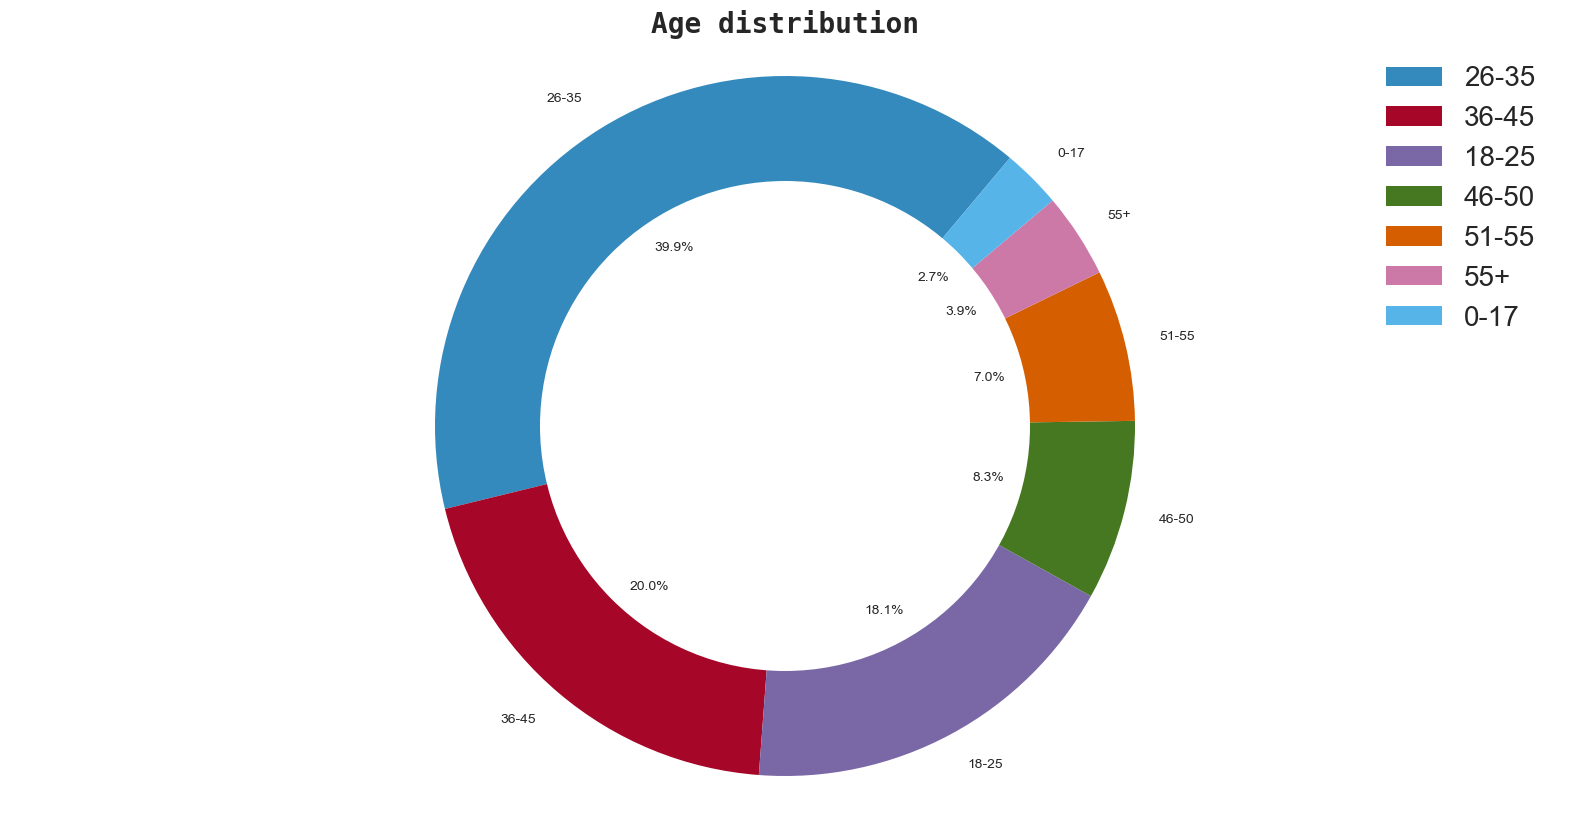

In [25]:
# Creating a donut chart for 'Age'
age = train['Age'].value_counts()
plt.style.use('bmh')
plt.figure(figsize=(20,10))
plt.pie(age.values, labels=age.index, startangle=50, autopct='%1.1f%%')
centre_circle =plt.Circle((0,0),0.7, fc='white')
fig =plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Age distribution', fontdict= {'fontname':'Monospace','fontsize':20,'fontweight':'bold'})
plt.axis('equal')
plt.legend(prop={'size':20})

plt.show()

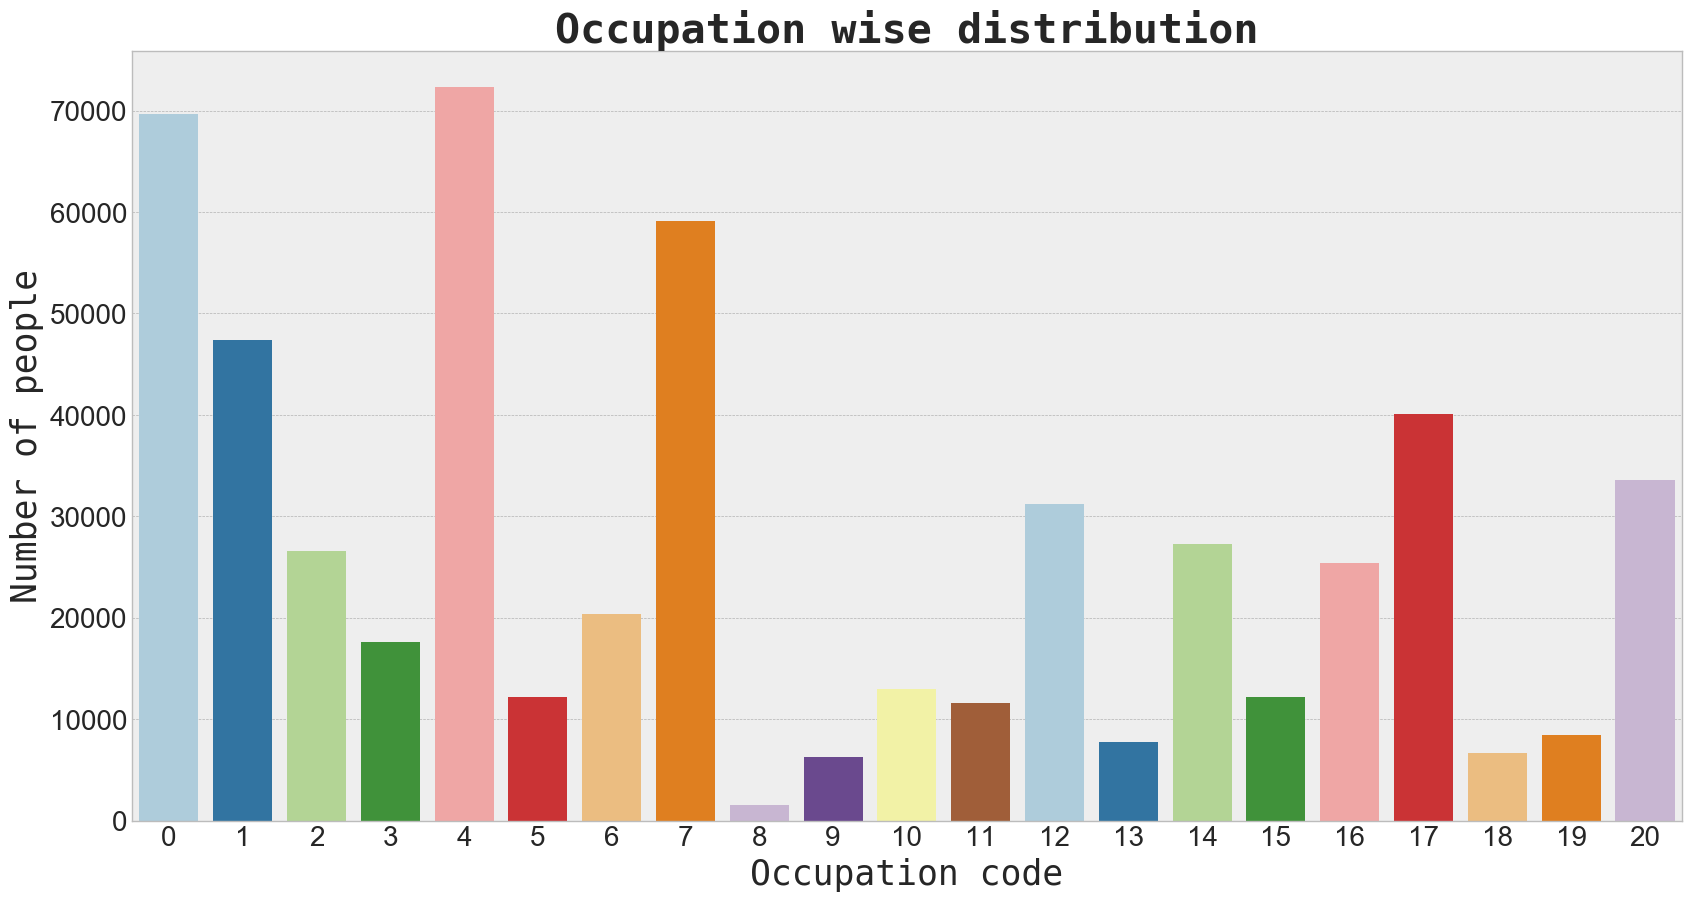

In [26]:
# creating a barplot for 'Occupation'
occupation = train['Occupation'].value_counts()
plt.style.use('seaborn-v0_8-bright')
plt.figure(figsize=(20,10))
sns.barplot(x=occupation.index ,y=occupation.values, palette='Paired')
plt.title('Occupation wise distribution', fontdict={'fontname':'Monospace','fontsize':30,'fontweight':'bold'})
plt.xlabel('Occupation code', fontdict={'fontname':'Monospace','fontsize':25})
plt.ylabel('Number of people', fontdict={'fontname':'Monospace','fontsize':25})
plt.tick_params(labelsize=20)
plt.show()

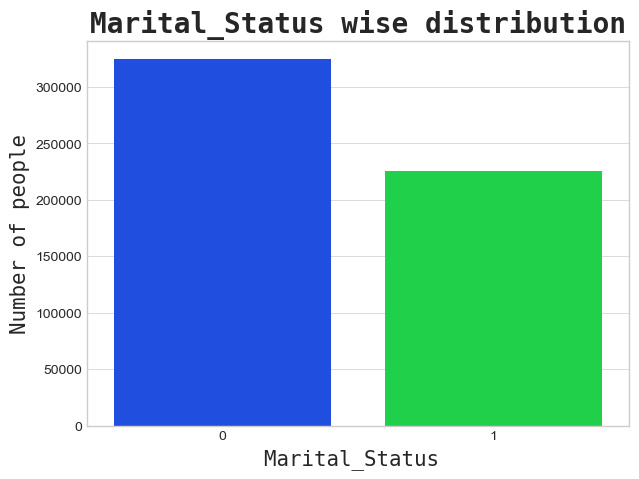

In [27]:
# creating a countplot for 'Marital_status'
# Marital_status = train['Marital_status'].value_counts()
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(7,5))
sns.countplot(x='Marital_Status',data=train)
plt.title('Marital_Status wise distribution', fontdict={'fontname':'Monospace','fontsize':20,'fontweight':'bold'})
plt.xlabel('Marital_Status ', fontdict={'fontname':'Monospace','fontsize':15})
plt.ylabel('Number of people', fontdict={'fontname':'Monospace','fontsize':15})
plt.tick_params(labelsize=10)
plt.show()

In [28]:
!pip install squarify

Defaulting to user installation because normal site-packages is not writeable


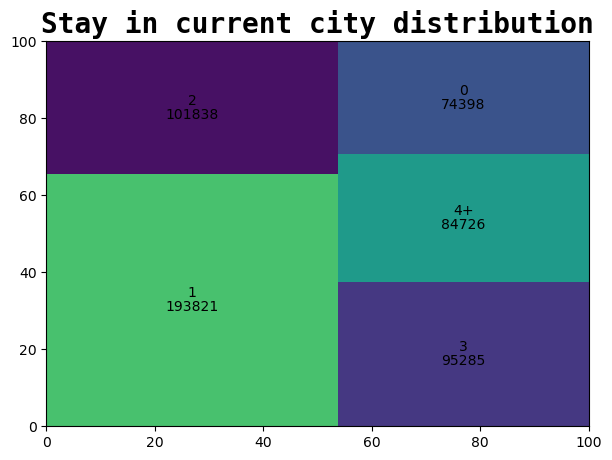

In [29]:
stay=train['Stay_In_Current_City_Years'].value_counts()
import squarify
plt.style.use('default')
plt.figure(figsize=(7,5))
squarify.plot(sizes = stay.values, label = stay.index, value = stay.values)
plt.title('Stay in current city distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.show()

In [30]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


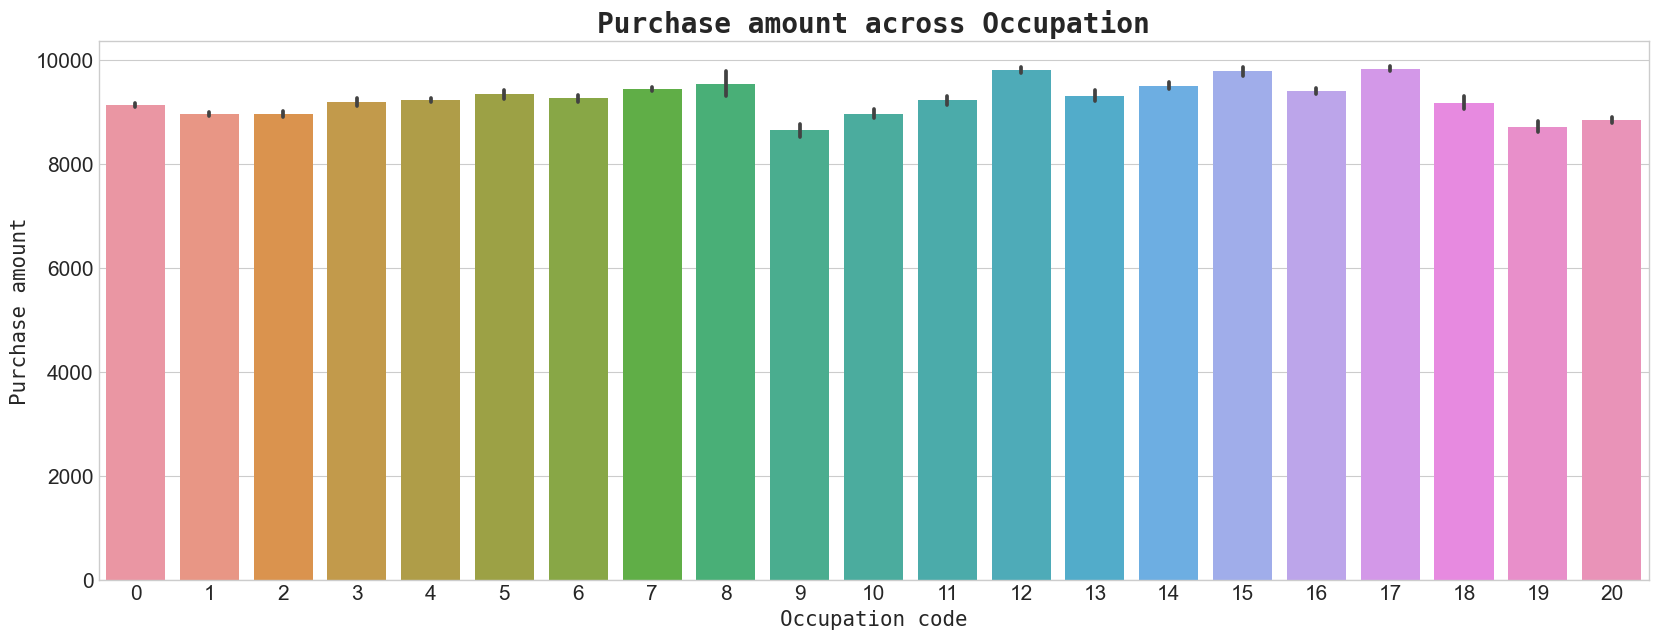

In [31]:
# Creating a barplot of "Occupation vs Purchase"
plt.figure(figsize=(20,7))
plt.style.use('seaborn-v0_8-whitegrid')
sns.barplot(x='Occupation',y='Purchase',data=train)
plt.title('Purchase amount across Occupation', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Occupation code', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 15)
plt.show()

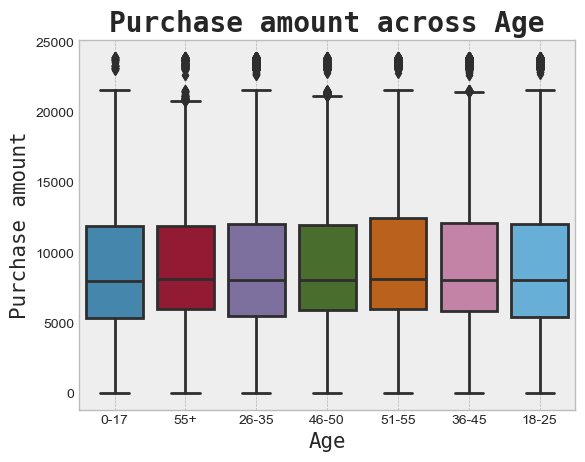

In [32]:
# Creating a boxplot of 'Age vs Purchase'
plt.style.use('bmh')
sns.boxplot(x='Age', y='Purchase',data=train)
plt.title('Purchase amount across Age', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Age', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 10)
plt.grid()
plt.show()

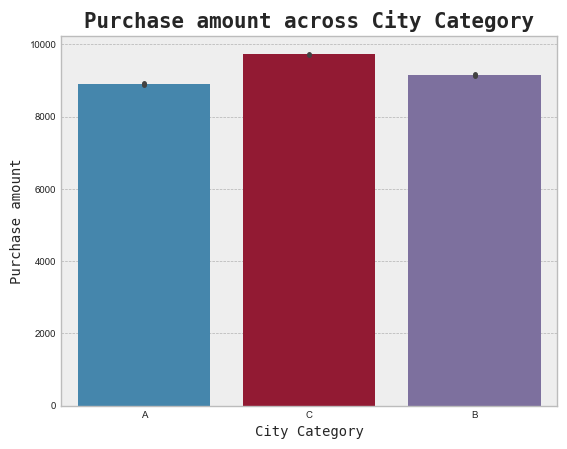

In [33]:
# Creating a barplot of 'City_Category vs Purchase'
plt.style.use('bmh')
sns.barplot(x='City_Category', y='Purchase', data=train)
plt.title('Purchase amount across City Category', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15, 'fontweight' : 'bold'})
plt.xlabel('City Category', fontdict = {'fontname' : 'Monospace', 'fontsize' : 10})
plt.ylabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 10})
plt.tick_params(labelsize = 7)
plt.show()

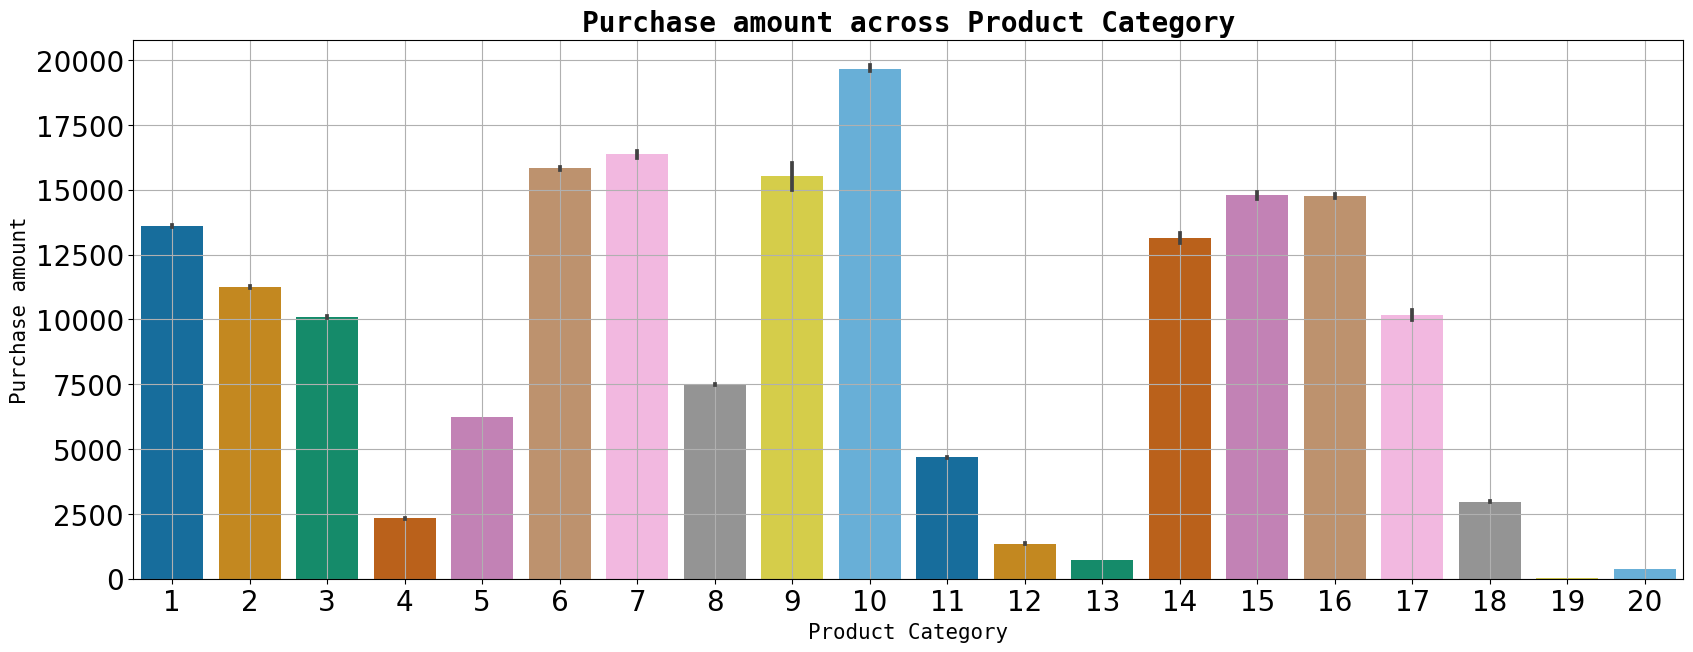

In [34]:
# Creating a barplot of 'Product_Category_1 vs Purchase'
plt.style.use('default')
plt.figure(figsize=(20,7))
sns.barplot(x='Product_Category_1',y='Purchase', data=train, palette='colorblind')
plt.title('Purchase amount across Product Category', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Product Category', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 20)
plt.grid()
plt.show()

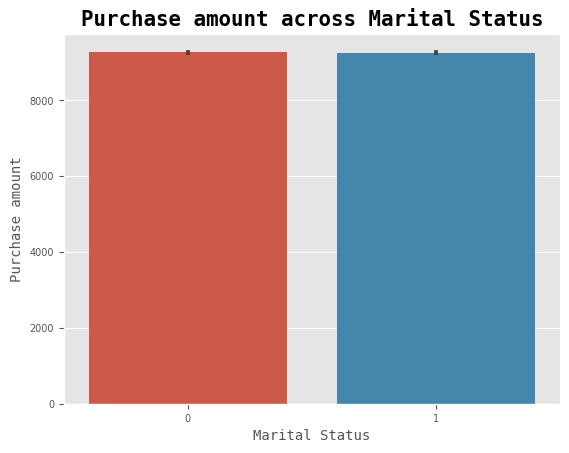

In [35]:
# Creating a barplot of 'Marital Status vs Purchase'
plt.style.use('ggplot')
sns.barplot(x='Marital_Status', y='Purchase', data=train)
plt.title('Purchase amount across Marital Status', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15, 'fontweight' : 'bold'})
plt.xlabel('Marital Status', fontdict = {'fontname' : 'Monospace', 'fontsize' : 10})
plt.ylabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 10})
plt.tick_params(labelsize = 7)
plt.show()

# 2.3 Multivariate Analysis¶

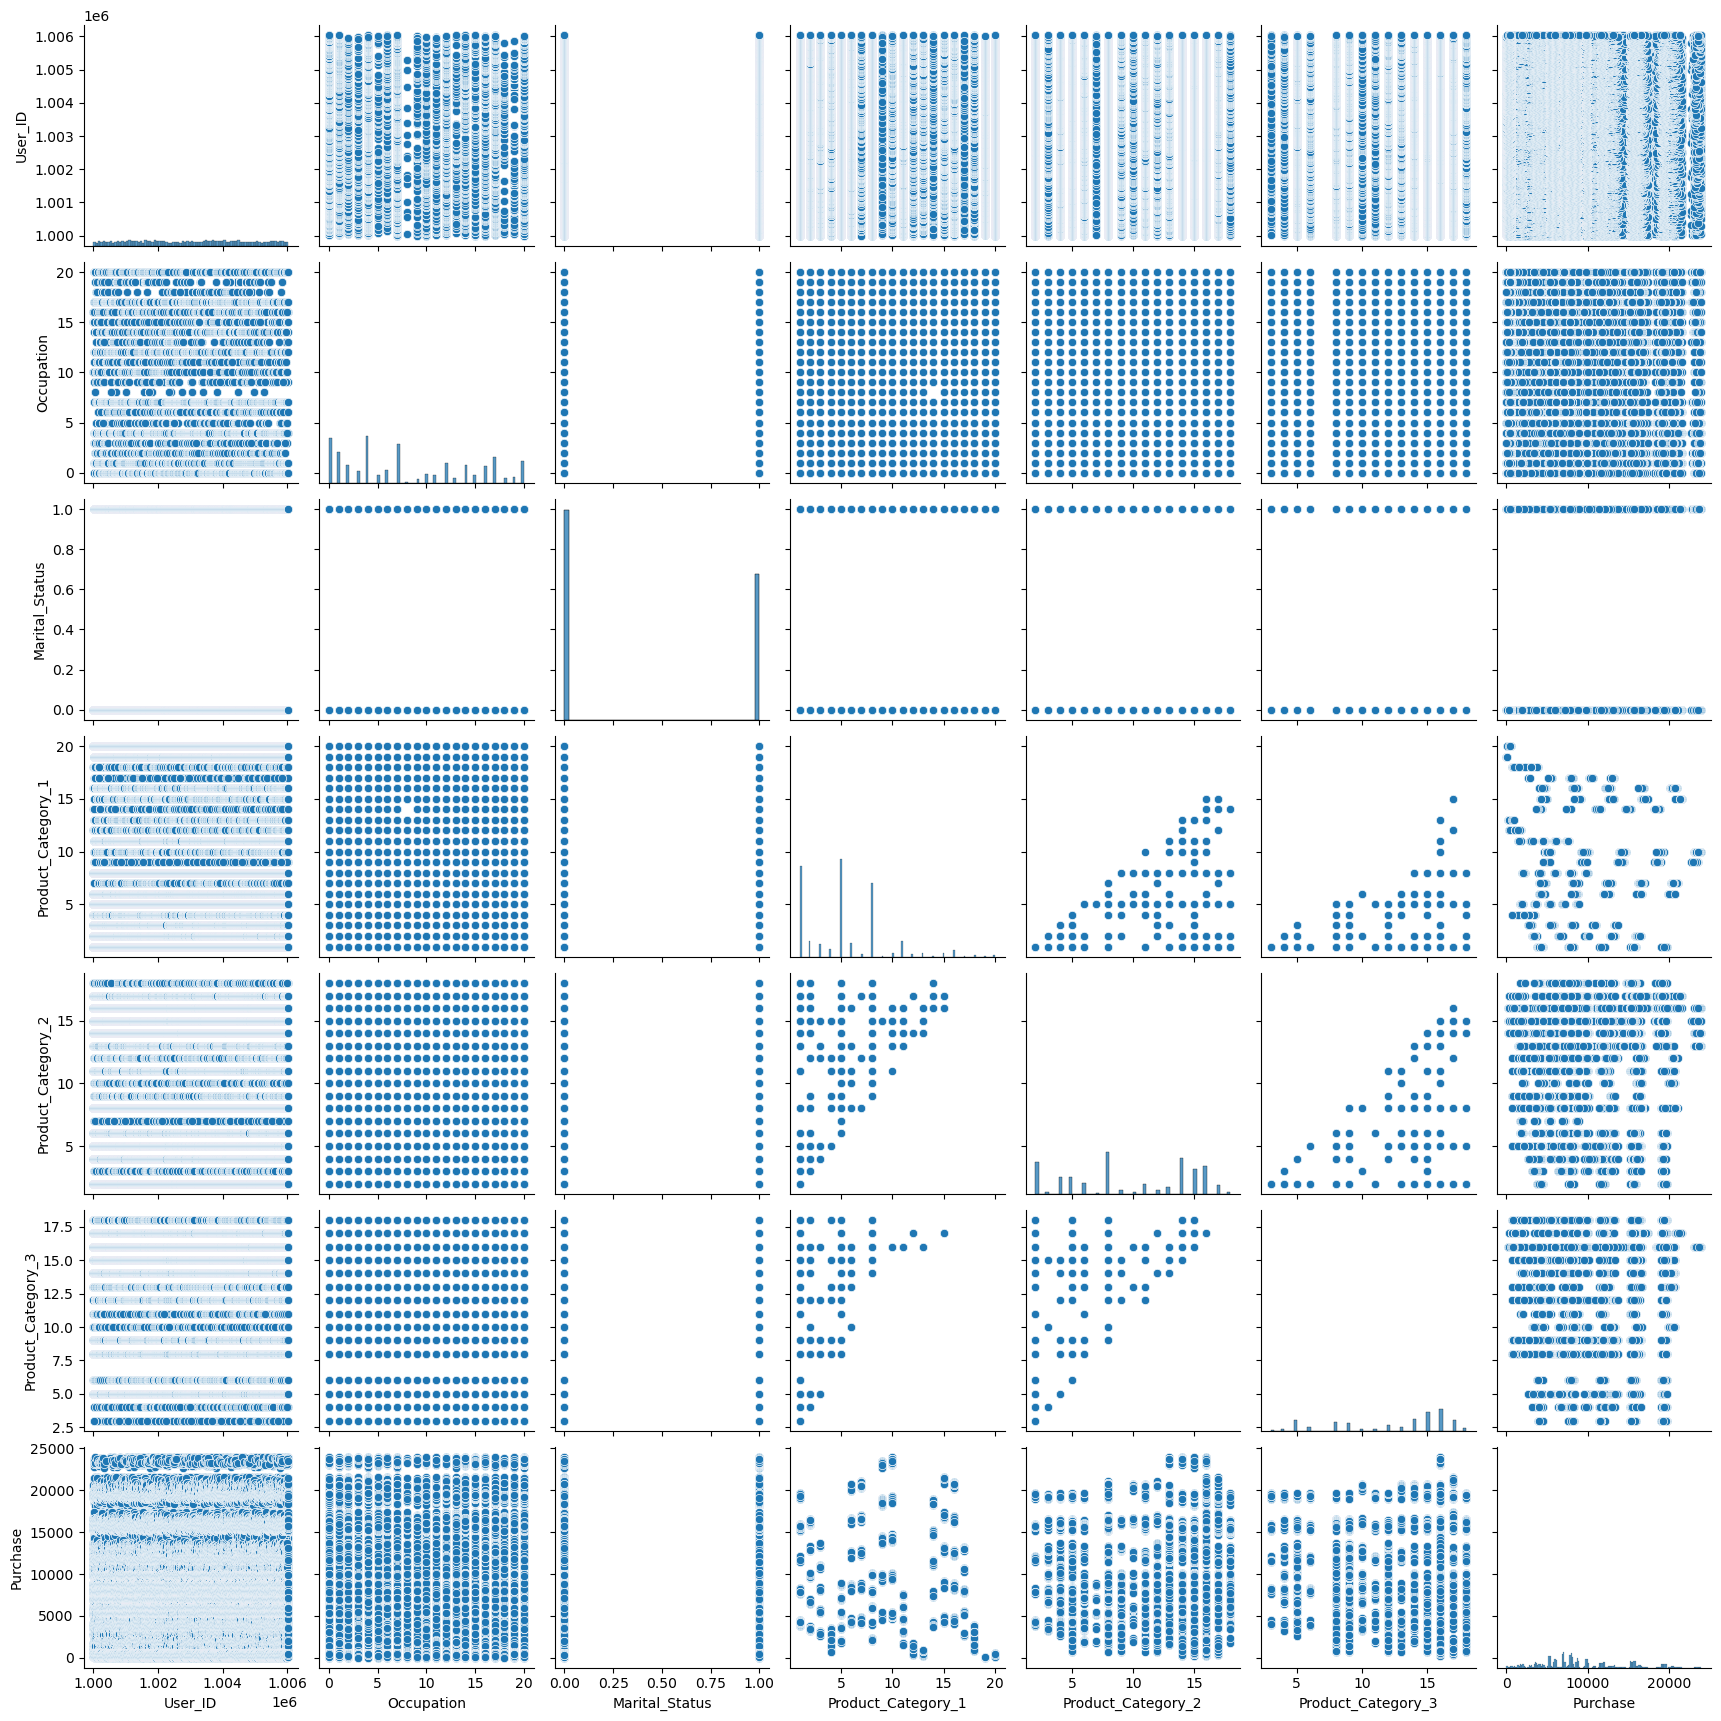

In [36]:
# Creating a Pairplot for all features
plt.style.use('default')
sns.pairplot(train)
plt.show()

In [37]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [38]:
#test.corr()# test correlation

In [39]:
# Creating a heatmap of correlation matrix

#sns.heatmap(test.corr(), annot=True, linewidths = .7)
#plt.show()

In [40]:
#test.info()

In [41]:
#test=test.drop(['Gender', 'City_Category', 'Marital_Status'], axis=1, inplace=True)

In [42]:
#test=test.drop('Stay_In_Current_City_Years',axis=1)

In [43]:
#test.corr()

In [44]:
#train.corr()

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [46]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [47]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


# data preprocessing
3.1 merging of train and test

In [48]:
train['source'] = 'train'
test['source'] = 'test'

In [49]:
dataset = pd.concat([train, test])

In [50]:
# 3.2 Replacing '+' in 'Age' and 'Stay_In_Current_City_Years'

In [51]:
dataset['Age'] = dataset['Age'].apply(lambda x:str(x).replace('55+', '55'))

In [52]:
dataset['Stay_In_Current_City_Years'] = dataset['Stay_In_Current_City_Years'].apply(lambda x:str(x).replace('4+', '4'))

In [53]:
dataset.sample(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source
226528,1001125,P00208842,F,18-25,4,B,2,0,11,16.0,NaN,NaN,test
439431,1001635,P00070542,M,26-35,0,B,1,0,3,15.0,NaN,13218.0,train
227021,1001799,P00033342,M,36-45,11,B,4,1,5,14.0,NaN,NaN,test
106458,1001943,P00363742,M,18-25,4,B,0,0,5,NaN,NaN,NaN,test
503966,1005630,P00051842,M,36-45,17,B,1,0,4,8.0,NaN,3552.0,train


In [54]:
dataset['Age'].unique()

array(['0-17', '55', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

# 3.3 Dropping irrelevant features

In [55]:
dataset.drop('Product_Category_3', axis=1, inplace=True)

In [56]:
dataset.drop('User_ID', axis=1, inplace=True)

In [57]:
dataset.drop('Product_ID', axis=1, inplace=True)

In [58]:
dataset.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,source
0,F,0-17,10,A,2,0,3,NaN,8370.0,train
1,F,0-17,10,A,2,0,1,6.0,15200.0,train
2,F,0-17,10,A,2,0,12,NaN,1422.0,train
3,F,0-17,10,A,2,0,12,14.0,1057.0,train
4,M,55,16,C,4,0,8,NaN,7969.0,train


# 3.4 Feature encoding

In [60]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

In [61]:
label_encoder_gender = LabelEncoder()
dataset['Gender'] = label_encoder_gender.fit_transform(dataset['Gender'])

In [62]:
label_encoder_age = LabelEncoder()
dataset['Age'] = label_encoder_age.fit_transform(dataset['Age'])

In [63]:
label_encoder_city = LabelEncoder()
dataset['City_Category'] = label_encoder_city.fit_transform(dataset['City_Category'])

In [64]:
dataset['Age'].value_counts()


Age
2    313015
3    156724
1    141953
4     65278
5     54784
6     30579
0     21334
Name: count, dtype: int64

In [65]:
dataset['Gender'].value_counts()

Gender
1    590031
0    193636
Name: count, dtype: int64

In [66]:
dataset['City_Category'].value_counts()

City_Category
1    329739
2    243684
0    210244
Name: count, dtype: int64

In [67]:
dataset.sample(5)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,source
430775,1,2,2,0,3,1,5,NaN,5335.0,train
58312,0,1,4,0,1,0,11,16.0,7463.0,train
389520,0,4,1,2,4,1,14,16.0,18749.0,train
171278,1,4,1,1,1,1,4,8.0,NaN,test
173637,1,2,2,1,3,1,8,NaN,NaN,test


# 3.5: Fixing null values in 'Product_Category_2'

In [68]:
dataset['Product_Category_2'].fillna(dataset['Product_Category_2'].median(), inplace=True)

# 3.6: Convert 'Stay_In_Current_City_Years' into numeric data type

In [69]:
dataset['Stay_In_Current_City_Years'] = dataset['Stay_In_Current_City_Years'].astype('int')

# 3.7: Separating dataset into train and test

In [70]:
train = dataset.loc[dataset['source'] == 'train']

In [71]:
test = dataset.loc[dataset['source'] == 'test']

In [72]:
train.drop('source', axis=1, inplace=True)
test.drop('source', axis=1, inplace=True)

In [73]:
train.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,0,0,10,0,2,0,3,9.0,8370.0
1,0,0,10,0,2,0,1,6.0,15200.0
2,0,0,10,0,2,0,12,9.0,1422.0
3,0,0,10,0,2,0,12,14.0,1057.0
4,1,6,16,2,4,0,8,9.0,7969.0


# 3.8: Separating train into X and Y

In [74]:
y = train['Purchase']

In [75]:
x = train.drop('Purchase', axis=1)

In [76]:
x

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
0,0,0,10,0,2,0,3,9.0
1,0,0,10,0,2,0,1,6.0
2,0,0,10,0,2,0,12,9.0
3,0,0,10,0,2,0,12,14.0
4,1,6,16,2,4,0,8,9.0
...,...,...,...,...,...,...,...,...
550063,1,5,13,1,1,1,20,9.0
550064,0,2,1,2,3,0,20,9.0
550065,0,2,15,1,4,1,20,9.0
550066,0,6,1,2,2,0,20,9.0


In [77]:
y

0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
           ...   
550063      368.0
550064      371.0
550065      137.0
550066      365.0
550067      490.0
Name: Purchase, Length: 550068, dtype: float64

In [78]:
from sklearn.ensemble import ExtraTreesRegressor
selector =ExtraTreesRegressor()

In [79]:
selector.fit(x,y)

ExtraTreesRegressor()

In [82]:
feature_imp  = selector.feature_importances_

In [83]:
for indx, val in enumerate(feature_imp):
    print(indx, round((val*100),2))

0 0.48
1 2.12
2 4.92
3 0.75
4 2.57
5 0.62
6 80.06
7 8.49


In [84]:
x.drop(['Gender', 'City_Category', 'Marital_Status'], axis=1, inplace=True)

In [85]:
for i in x:
    # IQR
    Q1 = np.percentile(train.loc[:,i],25)
    Q3 = np.percentile(train.loc[:,i],75)
    
    IQR = Q3-Q1
    
    print("Old shape : " , train.loc[:,i].shape)
    
    # Upper bound
    upper = np.where(train.loc[:,i]>=(Q3+2.5*IQR))
    
    # lower bound
    lower = np.where(train.loc[:,i]<=(Q1-2.5*IQR))
    
    print("{}--{}".format(upper,lower))
    
    try:
        train.drop(upper[0])
    except:
        print("keyError: {} not found in axis".format(upper[0]))
        
    try:
        train.drop(lower[0])
    except:
        print("KeyError : {} not found in axis".format(lower[0]))

Old shape :  (550068,)
(array([     4,    159,    160, ..., 550008, 550030, 550066], dtype=int64),)--(array([], dtype=int64),)
Old shape :  (550068,)
(array([], dtype=int64),)--(array([], dtype=int64),)
Old shape :  (550068,)
(array([], dtype=int64),)--(array([], dtype=int64),)
Old shape :  (550068,)
(array([], dtype=int64),)--(array([], dtype=int64),)
Old shape :  (550068,)
(array([], dtype=int64),)--(array([], dtype=int64),)


# 3.10 Feature Scaling

In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
scaler = StandardScaler()

In [88]:
for col in x.columns:
    x[col] = scaler.fit_transform(x[col].values.reshape(-1,1))
    

In [89]:
x

,Age,Occupation,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2
0,-1.844248,0.294864,0.109801,-0.610809,-0.136401
1,-1.844248,0.294864,0.109801,-1.118912,-0.846289
2,-1.844248,0.294864,0.109801,1.675656,-0.136401
3,-1.844248,0.294864,0.109801,1.675656,1.046745
4,2.588277,1.214734,1.660861,0.659449,-0.136401
...,...,...,...,...,...
550063,1.849523,0.754799,-0.665728,3.708069,-0.136401
550064,-0.366739,-1.084943,0.885331,3.708069,-0.136401
550065,-0.366739,1.061423,1.660861,3.708069,-0.136401
550066,2.588277,-1.084943,0.109801,3.708069,-0.136401


# 3.11 Creating a train test split

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [92]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (440054, 5)
X_test shape: (110014, 5)
y_train shape: (440054,)
y_test shape: (110014,)


# 4. Data Modelling

4.1 Linear Regression

In [93]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [94]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [95]:
y_pred_lin_reg = lin_reg.predict(X_test)

# 4.2 KNN Regression

In [96]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

In [97]:
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [98]:
y_pred_knn = knn.predict(X_test)

# 4.3 : Decision Tree Regression

In [99]:
from sklearn.tree import DecisionTreeRegressor

In [100]:
dectree_reg = DecisionTreeRegressor()

In [101]:
dectree_reg.fit(X_train,y_train)

DecisionTreeRegressor()

In [102]:
y_pred_dectree_reg = dectree_reg.predict(X_test)

# 4.4 Random Forest Regressor

In [103]:
from sklearn.ensemble import RandomForestRegressor
random_reg = RandomForestRegressor()

In [104]:
random_reg.fit(X_train,y_train)

RandomForestRegressor()

In [105]:
y_pred_random_reg = random_reg.predict(X_test)

# 4.5 :XGB Regressor

In [106]:
from xgboost import XGBRegressor
xgb = XGBRegressor(random_state=42)

In [107]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [108]:
y_pred_xgb = xgb.predict(X_test)

# Step 5: Model Evaluation

In [109]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [110]:
print('Linear Regression: ')
print("MSE : " , round(mean_squared_error(y_test, y_pred_lin_reg), 2))
print("RMSE : " , round(np.sqrt(mean_squared_error(y_test,y_pred_lin_reg)),2))
print("R2 score : " , r2_score(y_test,y_pred_lin_reg))

Linear Regression: 
MSE :  22085054.68
RMSE :  4699.47
R2 score :  0.12103412745405762


In [111]:
print('KNN Regression : ')
print("MSE : " , round(mean_squared_error(y_test, y_pred_knn), 2))
print("RMSE : " , round(np.sqrt(mean_squared_error(y_test,y_pred_knn)),2))
print("R2 score : " , r2_score(y_test,y_pred_knn))

KNN Regression : 
MSE :  10671812.02
RMSE :  3266.77
R2 score :  0.5752712093990905


In [112]:
print('Decision Tree regression : ')
print("MSE : " , round(mean_squared_error(y_test, y_pred_dectree_reg), 2))
print("RMSE : " , round(np.sqrt(mean_squared_error(y_test,y_pred_dectree_reg)),2))
print("R2 score : " , r2_score(y_test,y_pred_dectree_reg))

Decision Tree regression : 
MSE :  9398533.79
RMSE :  3065.7
R2 score :  0.6259465701060571


In [113]:
print('Random forest regression : ')
print("MSE : " , round(mean_squared_error(y_test, y_pred_random_reg), 2))
print("RMSE : " , round(np.sqrt(mean_squared_error(y_test,y_pred_random_reg)),2))
print("R2 score : " , r2_score(y_test,y_pred_random_reg))

Random forest regression : 
MSE :  9195455.47
RMSE :  3032.4
R2 score :  0.6340289096408136


In [114]:
print('XGB regression : ')
print("MSE : " , round(mean_squared_error(y_test, y_pred_xgb), 2))
print("RMSE : " , round(np.sqrt(mean_squared_error(y_test,y_pred_xgb)),2))
print("R2 score : " , r2_score(y_test,y_pred_xgb))

XGB regression : 
MSE :  8891972.92
RMSE :  2981.94
R2 score :  0.6461072499455977


# step 6: Hyperparameter tuning

In [115]:
from sklearn.model_selection import RandomizedSearchCV

In [116]:
max_depth = [int(x) for x in np.linspace(start=5, stop=20, num=15)]
learning_rate = ['0.01', '0.05', '0.1', '0.25', '0.5', '0.75', '1.0']


In [117]:
min_child_weight  = [int(x) for x in np.linspace(start=45, stop=70,num=15)]

In [118]:
params = {
    'learning_rate' : learning_rate,
    'max_depth' : max_depth,
    "min_child_weight" : min_child_weight,
    "gamma" : [0.0,0.1,0.2,0.3,0.4],
    'colsample_bytree':[0.3,0.4,0.5,0.7]
}

In [119]:
xgb_tune = XGBRegressor(verbosity=0, random_state=42)

In [120]:
xgb_cv = RandomizedSearchCV(xgb_tune,param_distributions=params, cv=5, random_state=42)

In [121]:
xgb_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=42, ...),
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': ['0.01', '0.05', '0.1',
                                                          '0.25', '0.5', '0.75',
                                                          '1.0'],
                                        'max_depth': [5, 6, 7, 8, 9, 10, 11, 12,
                                                      13, 14, 15, 16, 17, 18,
                                                      20],
                                        'min_child_weight': [45, 46, 48, 50, 52,
                                                             53, 55, 57, 59, 61,
                                                             62, 64, 66, 68,
                                                             70]},
                   random_state=42)

In [122]:
xgb_cv.best_score_

0.6512209818075287

In [123]:
xgb_cv.best_params_

{'min_child_weight': 66,
 'max_depth': 11,
 'learning_rate': '1.0',
 'gamma': 0.3,
 'colsample_bytree': 0.7}

In [124]:
xgb_best = XGBRegressor(min_child_weight=66,
                        colsample_bytree=0.7 ,gamma=0.3, max_depth = 11, learning_rate = 1.0)

In [125]:
xgb_best.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.3, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=1.0, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=11, max_leaves=None,
             min_child_weight=66, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [126]:
Y_pred_xgb_best  = xgb_best.predict(X_test)

In [127]:
print('XGB regression After hyperparameter tuning : ')
print("MSE : " , round(mean_squared_error(y_test, Y_pred_xgb_best), 2))
print("RMSE : " , round(np.sqrt(mean_squared_error(y_test,Y_pred_xgb_best)),2))
print("R2 score : " , r2_score(y_test,Y_pred_xgb_best))

XGB regression After hyperparameter tuning : 
MSE :  8917168.91
RMSE :  2986.16
R2 score :  0.6451044714409484


# Conclusion:
In this project, we tried to build a model using various algorithms such as Linear regression, KNN regression, Decision tree regression, Random forest and XGB regressor to get the best possible prediction.

The hyperparameter tuned XGB regressor gives us the best rmse value and r2 score for this problem.

​